In [50]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import scipy as sp
from scipy import stats
matplotlib.rcParams['savefig.dpi'] = 144

### Hypothesis Testing:
- Let’s talk about t-tests, p-values.  
- How are they related?  
- What is it telling you?  
- How does it relate to precision-recall?  
- What are the underlying assumptions?

The t-test was developed by William Seasly Gosset at Guinness brewery over a hundered years ago. He developed this test to determine things like the difference between barely yields. To prevent further disclosure of confidential information, Guinness prohibited its employees from publishing any papers regardless of the contained information. However, after pleading with the brewery and explaining that his mathematical and philosophical conclusions were of no possible practical use to competing brewers, he was allowed to publish them, but under a pseudonym ("Student"), to avoid difficulties with the rest of the staff.Thus his most noteworthy achievement is now called Student's, rather than Gosset's, t-distribution.

<tr> 
<td> <img src="images/William_Sealy_Gosset.jpg",width=200,height=60>
<td> <img src="images/20120419-guinness.jpg",width=300,height=100>
<td> <img src="images/barley.jpg",width=350,height=100>
</tr>

Now imagine we have two barley fields A and B, and we would like to compare the yield without cutting down the whole field. So I start taking n samples from both fields, if the number of samples are large enough we would have a normal distribution (why?). However in case of small samples it does not look like a perfect bell shape, rather a histogram shape. Same thing applies to field B. 

![Barely Fields](images/Barley_fields.jpg)


Now we would like to know which field has a better yield, what should we do?

In [56]:
field_a = np.array([15.2,15.3,16.0,15.8,15.6,14.9,15.0,15.4,15.6,15.7,15.5,15.2,15.5,15.1,15.3,15.0])
field_b = np.array([15.9,15.9,15.2,16.6,15.2,15.8,16.2,15.6,15.6,15.8,15.5,15.5,15.5,15.5,14.9,15.9])

print "Yield of field A:", field_a.mean()
print "Yielf of field B:", field_b.mean()

Yield of field A: 15.38125
Yielf of field B: 15.6625


We then compare the means and it seems that field B has a larger mean than A, but this is only part of the picture (why?) and the mean can only tell us so much.

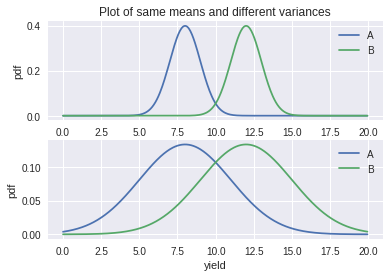

In [39]:
# Below we plot two pairs of distribution with same mean and difference variances

x1 = np.arange(0,20,.05)

plt.subplot(211)
plt.plot(x1, stats.norm.pdf(x1,8, 1), label="A")
plt.plot(x1, stats.norm.pdf(x1,12, 1), label="B")
plt.ylabel("pdf")
plt.title("Plot of same means and different variances")
plt.legend()

plt.subplot(212)
plt.plot(x1, stats.norm.pdf(x1,8, 3), label="A")
plt.plot(x1, stats.norm.pdf(x1,12, 3), label="B")

plt.xlabel("yield")
plt.ylabel("pdf")
plt.legend()

plt.show()

We can have different distributions with the same means and depending on those distributions or variances we can have statistically significant differences or not. It is where t-value comes handy, it is really the ratio of signal to noise.

$$t_{value} = \frac{signal}{noise}=\frac{difference\ between\ group\ means}{variability\ of\ groups}=
 \frac{|\bar{x_1}-\bar{x_2}|}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}$$

In [53]:
abar = field_a.mean()
avar = field_a.var(ddof=1)
na = field_a.size
adof = na - 1

bbar = field_b.mean()
bvar = field_b.var(ddof=1)
nb = field_b.size
bdof = nb - 1

# Use the formulas directly.
tf = (abar - bbar) / np.sqrt(avar/na + bvar/nb)
dof = (avar/na + bvar/nb)**2 / (avar**2/(na**2*adof) + bvar**2/(nb**2*bdof))
pf = 2*sp.special.stdtr(dof, -np.abs(tf))
print("formula:              t = %g  p = %g" % (tf, pf))

# Use scipy.stats.ttest_ind_from_stats.
t2, p2 = stats.ttest_ind_from_stats(abar, np.sqrt(avar), na,
                              bbar, np.sqrt(bvar), nb,
                              equal_var=False)
print("ttest_ind_from_stats: t = %g  p = %g" % (t2, p2))


# Use scipy.stats.ttest_ind.
t, p = stats.ttest_ind(field_a, field_b, equal_var=False)
print("ttest_ind:            t = %g  p = %g" % (t, p))

formula:              t = -2.18901  p = 0.0370677
ttest_ind_from_stats: t = -2.18901  p = 0.0370677
ttest_ind:            t = -2.18901  p = 0.0370677


Since t-value > 1 that means we have more signal than noise, now we are going to run  a t-test.
what are we testing? we are testing the null $H_0$ hypothesis, that says there is no statistically significant difference in our samples meaning that any difference we find is simply due to chance!

Now we need a critical value for t-value, if our value is lower than that we do NOT reject the null hypothesis. Conversly if it's greater than the critical value we reject the null hypothesis (there must be an alternate hypothesis).

Generally in science we use 0.05 (debatable) probability. what does it mean? This is an inferential statistics, meaning that if we do the experiment 100 times, 95 times we are going to reject the null hypothesis and 5 times we wouldn't.

## Assumptions for the t-test:
- We need to have normal distribution for both population and the sample, but works well with small sample size
- Similar variances
- Data Points
    - Same or similar number of samples
    - 20-30+ data points

## Hypothesis Testing and Error Types:

In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (also known as a "false positive" finding), while a type II error is incorrectly retaining a false null hypothesis (also known as a "false negative" finding). More simply stated, a type I error is to falsely infer the existence of something that is not there, while a type II error is to falsely infer the absence of something that is.

| Table of Error Types |      Null hypothesis ($H_0$) is True     |    Null hypothesis ($H_0$) is False     |
|-------------------|:------------------------:|:-----------------------:|
| **Reject $H_0$** |     Type I error (False Positive)       | Correct inference (True Positive) |
| **Fail to Reject $H_0$** | Correct inference (True Negative) |     Type II error (False Negative)       |

### How does the value of $\alpha$ affect precision and recall?

Assuming the default value of $\alpha=0.05$ and given the following equations for precision and recall:

 $$ Precision = \frac{TP}{TP+FP} $$ and $$Recall = \frac{TP}{TP+FN}$$

- If we decrease $\alpha$ to 0.01, then we tend to reject $H_0$ **less often** and therefore **FP** decreases causing precision to increase, **FN** increases causing recall to decrease.
- Conversly, if we increase $\alpha$ to 0.07, then we tend to reject $H_0$ **more often** and therefore **FN** decreases causing recall to increase, **FP** increases casuing precision to decrease.